## 步骤

### 1.了解数据集
### 2.绘制拟合曲线

In [92]:
import regression
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [93]:
X, y = regression.loadDataSet('data/temperature.txt')
m, n = X.shape
X = np.concatenate((np.ones((m,1)),X), axis=1)
rate = 0.0001
max_loop = 1000
epsilon = 0.01
result, time_consumed = regression.bgd(rate, max_loop, epsilon, X, y)
theta, errors, thetas = result

In [94]:
print('Shape of X : ' + str(X.shape) + 
      '\nShape of y : ' + str(y.shape) +
      '\nShape of theta :' + str(theta.shape))
print('X : \n' + str(X))

Shape of X : (15, 2)
Shape of y : (15, 1)
Shape of theta :(2, 1)
X : 
[[  1.  50.]
 [  1.  50.]
 [  1.  50.]
 [  1.  70.]
 [  1.  70.]
 [  1.  70.]
 [  1.  80.]
 [  1.  80.]
 [  1.  80.]
 [  1.  90.]
 [  1.  90.]
 [  1.  90.]
 [  1. 100.]
 [  1. 100.]
 [  1. 100.]]


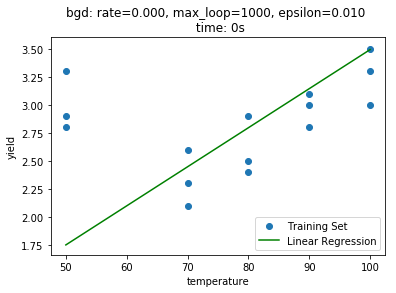

In [28]:
#绘制联合曲线
fitting_fig = plt.figure()
title = 'bgd: rate=%0.03f, max_loop=%d, epsilon=%.3f \n time: %ds' % (rate, max_loop,epsilon, time_consumed)
ax = fitting_fig.add_subplot(111,title=title)
training_set = ax.scatter(X[:,1].flatten().A[0], y[:,0].flatten().A[0])
x_copy = X.copy()
x_copy.sort(0)
yhat = x_copy * theta
fitting_line, = ax.plot(x_copy[:,1], yhat, color='g')
ax.set_xlabel('temperature')
ax.set_ylabel('yield')

plt.legend([training_set, fitting_line], ['Training Set','Linear Regression'])  #画右下角
plt.show()

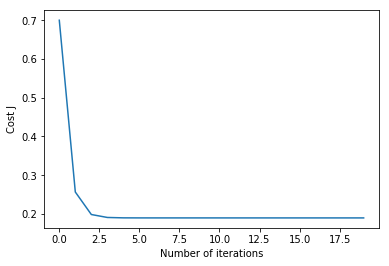

In [45]:
#绘制误差曲线
errors_fig = plt.figure()
ax = errors_fig.add_subplot(111)
#ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4f'))
ax.plot([i for i in range(20)], errors[0:20])
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')
plt.show()

## 多项式回归
$$ h(\theta) = \theta_0 + \theta_1x + \theta_2x^2$$
首先因为$x, x^2$数值差异大，进行特征标准化，缩放到【-1，1】区间，$$z =  \frac{x-\mu}{\sigma}$$

In [53]:
def standardize(X):
    """特征标准化处理
    Args:
        X 样本集，array格式
    Returns:
        标准后的样本集
    """
    m, n = X.shape
    for j in range(n): #针对每一个特征，标准化
        features = X[:,j]
        mean_value = features.mean(axis=0)
        std = features.std(axis=0)
        if std != 0:
            X[:,j] = (features - mean_value) / std
        else:
            X[:,j] = 0
    return X

In [168]:
import regression
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

srcX, y = regression.loadDataSet('data/temperature.txt')  # srcX (15,1)
m,n = srcX.shape

srcX = np.concatenate((srcX[:, 0], np.power(srcX[:, 0],2)), axis=1)  #srcx (15,2)
# 特征缩放
X = standardize(srcX.copy())  #注意要拷贝，不能改动原来srcX
X = np.concatenate((np.ones((m,1)), X), axis=1)   #X (15,3)

rate = 0.1
max_loop = 1000
epsilon = 0.01

result, time_consumed = regression.bgd(rate, max_loop, epsilon, X, y)
theta, errors, thetas = result

print('Shape of srcX : ' + str(srcX.shape) +
      '\nShape of X : ' + str(X.shape) + 
      '\nShape of y : ' + str(y.shape) +
      '\nShape of theta :' + str(theta.shape))
print('X : \n' + str(srcX))

Shape of srcX : (15, 2)
Shape of X : (15, 3)
Shape of y : (15, 1)
Shape of theta :(3, 1)
X : 
[[   50.  2500.]
 [   50.  2500.]
 [   50.  2500.]
 [   70.  4900.]
 [   70.  4900.]
 [   70.  4900.]
 [   80.  6400.]
 [   80.  6400.]
 [   80.  6400.]
 [   90.  8100.]
 [   90.  8100.]
 [   90.  8100.]
 [  100. 10000.]
 [  100. 10000.]
 [  100. 10000.]]


[[ 50.        ]
 [ 51.02040816]
 [ 52.04081633]
 [ 53.06122449]
 [ 54.08163265]
 [ 55.10204082]
 [ 56.12244898]
 [ 57.14285714]
 [ 58.16326531]
 [ 59.18367347]
 [ 60.20408163]
 [ 61.2244898 ]
 [ 62.24489796]
 [ 63.26530612]
 [ 64.28571429]
 [ 65.30612245]
 [ 66.32653061]
 [ 67.34693878]
 [ 68.36734694]
 [ 69.3877551 ]
 [ 70.40816327]
 [ 71.42857143]
 [ 72.44897959]
 [ 73.46938776]
 [ 74.48979592]
 [ 75.51020408]
 [ 76.53061224]
 [ 77.55102041]
 [ 78.57142857]
 [ 79.59183673]
 [ 80.6122449 ]
 [ 81.63265306]
 [ 82.65306122]
 [ 83.67346939]
 [ 84.69387755]
 [ 85.71428571]
 [ 86.73469388]
 [ 87.75510204]
 [ 88.7755102 ]
 [ 89.79591837]
 [ 90.81632653]
 [ 91.83673469]
 [ 92.85714286]
 [ 93.87755102]
 [ 94.89795918]
 [ 95.91836735]
 [ 96.93877551]
 [ 97.95918367]
 [ 98.97959184]
 [100.        ]]


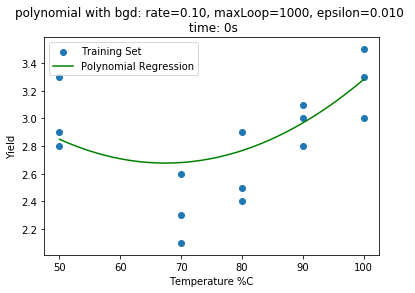

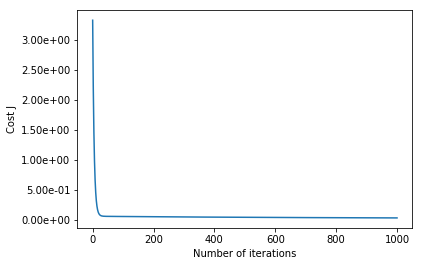

In [170]:
# 打印特征点
fitting_fig = plt.figure()
title = 'polynomial with bgd: rate=%.2f, maxLoop=%d, epsilon=%.3f \n time: %ds'%(rate,maxLoop,epsilon,time_consumed)
ax = fitting_fig.add_subplot(111, title=title)
training_set = ax.scatter(srcX[:, 0].flatten().A[0], y[:,0].flatten().A[0])

# 打印拟合曲线
fitting_X = np.linspace(50,100,50).reshape((50,1))
fitting_X_power = np.power(fitting_X,2)
X_matrix = np.concatenate((fitting_X, fitting_X_power), axis=1)
fitting_y = []
standardize_X = np.concatenate((np.ones((50,1)),standardize(X_matrix)), axis=1)
fitting_y =  standardize_X.dot(theta)
print(fitting_X)
fitting_line, = ax.plot(fitting_X, fitting_y, color='g')

ax.set_xlabel('Temperature %C')
ax.set_ylabel('Yield')

plt.legend([training_set, fitting_line], ['Training Set', 'Polynomial Regression'])
plt.show()

# 打印误差曲线
errorsFig = plt.figure()
ax = errorsFig.add_subplot(111)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

ax.plot(range(len(errors)), errors)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')

plt.show()